## **Curse of Dimensionality**
- In machine learning we have multiple columns that we call as features.
- These features can be referred to as the dimensions of features.
- THere are optimal number of features that will give the best performance, increasing or decresing the features may decrease the performance.

This means that the data becomes sparse. Think of it this way: if you have a line (1D), it's easy to fill it with a few points. If you have a square (2D), you need more points to cover the area. Now, imagine a cube (3D) - you'd need even more points to fill the space. This concept extends to higher dimensions, making the data extremely sparse

#### **What problems does it cause?**

1. Data sparsity
2. Increased computation
3. Overfitting
4. Distances lose meaning
5. Performance degradation
6. Visualization challenges


#### **How to Solve Curse of Dimensionality**
The primary solution to the curse of dimensionality is "dimensionality reduction." It's a process that reduces the number of random variables under consideration by obtaining a set of principal variables. By reducing the dimensionality, we can retain the most important information in the data while discarding the redundant or less important features.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
import plotly.express as px

# **Dimensionality Reduction Methods**

# **Principal Component Analysis**
PCA is a statistical method that transforms the original variables into a new set of variables, which are linear combinations of the original variables. These new variables are called principal components.

- PCA is an unsupervised machine learning problem.
- Used to reduce the features and increase the speed of machine learning algo.
- Finds the best possible lower dimension that best represents the data while preserving the essence of the data.



### **Benefits of using PCA:**
- Faster execution of Algorithms
- Make it easier to reduxe data to 2D or 3D thius maks it better for visualizations.

### **Importance of Variance in PCA**'
Variance in PCA helps prioritize the components that capture the most significant patterns in the data, facilitates dimensionality reduction, enhances interpretability, and reduces noise, making it a crucial element in the analysis and transformation process.

### **PCA uing scikit-learn**
Now we will see how we can use pCA in sklearn to transform our dataset to lower dimensions.

We will now use PCA on a cancer dataset that has 31 features, we'll convert it into lower dimensions.

In [2]:
df = load_breast_cancer()
data = df.data
labels = df.target
labels = np.reshape(labels,(569,1))
final_data = np.concatenate([data,labels],axis=1)
dataset = pd.DataFrame(final_data)
features = df.feature_names
features_labels = np.append(features,'label')
dataset.columns = features_labels


dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
X = dataset.drop(columns = 'label')
y = dataset['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
X_train.shape

(455, 30)

### **Apply KNN Classifier**
Now let's apply the KNN to check the performance before PCA.

In [6]:
model = KNeighborsClassifier()

In [7]:
model.fit(X_train, y_train)

KNeighborsClassifier()

Here let's also note down the time interval it takes to predict the data and comapre it with the PCA processed data.

In [8]:
import time
start = time.time()
y_pred = model.predict(X_test)
print(time.time() - start)

0.0598902702331543


In [9]:
accuracy_score(y_test,y_pred)

0.956140350877193

### **Use PCA to reduce dimensionality**
Now we will redxe the dimension of data using PCA and see if the time has decreased or not, but first we need to standardize our data. For that I am using Standard Scaler from sklearn.

In [10]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Use PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [12]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [13]:
model = KNeighborsClassifier()

In [14]:
model.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [15]:
import time
start = time.time()
y_pred = model.predict(X_test_trf)
print(time.time() - start)

0.014957427978515625


In [16]:
accuracy_score(y_test,y_pred)


0.9736842105263158

From the above outputs we can clearly see thatafter applying PCA not only the processing ime increased but also the accuracy of our model increased.

### **Selecting the best `n_components`**
For this we will use a for loop to check on all the values(max number of features). For this purpose we can also use Random Search or Grid Search.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,29):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn  = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

0.9473684210526315
0.9736842105263158
0.9210526315789473
0.9385964912280702
0.956140350877193
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315


From the above code we can see that if we select two features for PCA it gives the best accuracy.

In [18]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

### **Visualize the data**
Now that our data has been converted to 2D we can easily visualize it with the help of 2D scatterplot.

In [19]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


We can also get the eigen values and eigen vectors for the PCA.

In [20]:
pca.explained_variance_
# Eigen values

array([13.07958081,  5.86288753])

In [21]:
pca.components_.shape
# Eigen vectors

(2, 30)

In [22]:
np.cumsum(pca.explained_variance_ratio_)


array([0.43502782, 0.63002788])

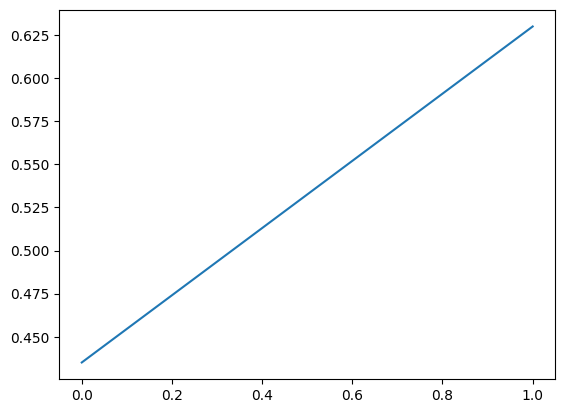

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**Rapid Increase at the Beginning:** The plot shows a steep increase initially, indicating that the first few principal components capture most of the variance in the data.

**Elbow Point:** There is an "elbow" around the 10th component. After this point, adding more components contributes very little to the explained variance. This suggests that around 10 components may be sufficient to capture most of the variance.

**Diminishing Returns:** Beyond the 20th component, the curve flattens, indicating that additional components add minimal explained variance.

# **2. Linear Discriminant Analysis**
Linear Discriminant Analysis, commonly referred to as LDA or Discriminant Function Analysis, serves as a dimensionality reduction technique primarily employed in supervised classification problems to facilitate the modeling of differences distinguishing groups and optimally separate two or more categories. 

- By projecting features from a higher-dimensional space into one of lower dimensionality, LDA functions as a supervised learning algorithm specially designed for categorization tasks, aiming to pinpoint a linear combination of traits separating classes optimally within a dataset.

- For example, take a scenario with two classes we need to separate efficiently. Each class contains multiple characteristics. Relying solely on a single attribute to categorize them may result in some overlap. 

- As such, we will continue increasing the number of traits examined for proper classification to minimally overlap the classes until they are optimally segregated. 

- Some classes are simply more complex than others to untangle and require considering a greater number of features together to fully unravel the mysteries distinguishing one from another.

#### **Assumptions of LDA**
**1.** LDA assumes that the data has a Gaussian distribution 

**2.** The covariance matrices of the different classes are equal. 

**3.** It also assumes that the data is linearly separable, meaning that a linear decision boundary can accurately classify the different classes.

#### **How does LDA work?**
LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In other words, it finds the directions in the feature space that best separates the different classes of data.


For demonstration of LDA, I am creating a classififcation data, we will convert it into 2D space and train our model on the 2D data.

In [24]:
X, y = make_classification(
    n_features=20,
    n_classes=4,
    n_samples=3000,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)

In [25]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an LDA model
lda = LDA(n_components = 2)

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


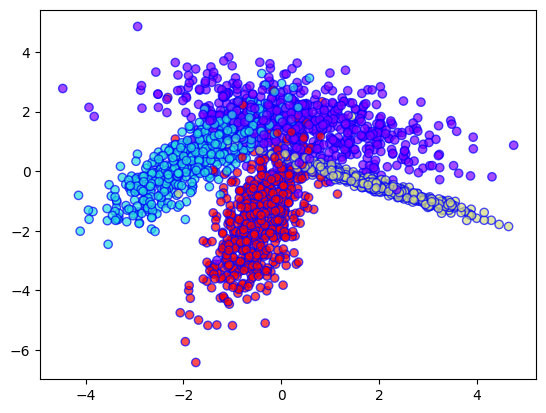

In [27]:
# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)


In [28]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.7916666666666666
[[ 97  24  15   3]
 [ 23 119   0  23]
 [  5   4 130   9]
 [  7   3   9 129]]


In [29]:
# Print LDA attributes
print("Explained Variance Ratio:", lda.explained_variance_ratio_)
print("Class-wise Means:", lda.means_)
print("Class Priors:", lda.priors_)

Explained Variance Ratio: [0.53929621 0.45851262]
Class-wise Means: [[ 5.13482796e-03  2.85282242e-02 -2.95517446e-02  2.20946822e-02
  -4.20856256e-02 -7.86139843e-03 -7.82249088e-01 -5.91376432e-02
   2.71548993e-02  1.68554997e-02 -5.02536260e-03 -4.24029845e-02
   1.07243957e+00  3.96700290e-03  1.58839375e-02  2.04921312e-02
   1.05389531e+00 -7.62128109e-01 -1.43234357e-02  1.57647054e-02]
 [-6.06029083e-02  1.19887142e-03  3.12821366e-02 -9.62923000e-03
  -4.94612524e-02  7.89806208e-03 -7.59449334e-01  3.63299701e-02
   2.24531445e-02  5.40808930e-02 -1.35973547e-02  4.35860623e-02
   3.95429272e-03 -3.18934129e-02 -2.69191281e-02  2.80005044e-02
   2.08945985e-01  7.74770533e-01 -1.29810069e-02 -1.75281850e-02]
 [-3.73108185e-03  1.41183696e-02 -2.78177905e-02 -1.75138121e-02
   5.65840112e-02 -6.38689134e-02  7.42983521e-01 -1.74501868e-02
   1.84585939e-02  2.07388260e-04  1.61490700e-02 -4.67886063e-02
   1.56195755e-02 -9.95251179e-02  4.65977497e-02 -6.02749637e-02
  -1.8

# **t-Distributed Stochastic Neighbour Embedding (t-SNE)**
- t-SNE is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data.
- Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line.

### **How t-SNE works?**
The t-SNE algorithm finds the similarity measure between pairs of instances in higher and lower dimensional space. After that, it tries to optimize two similarity measures. It does all of that in three steps. 

1. The notion is that t-SNE can pick a point and say in the higher-dimensions this one was a neighbor of that other high-dimensional counterpart over here. This is done first by calculating a pairwise similarity between all data points in the high-dimensional space with a Gaussian kernel. Points further away from each other are less likely to be picked than points closer together.

2. Given this, the algorithm is to identify how it can pull up apart the highest dimensional pair wise points in a given class into lower dimensions.

3. It is Best obtained by matching the probability distribution of high dimensional and low-dimensional. The algorithm, within the space of hypotheses represented as above; minimizes this divergence by using gradient descent. Train an optimized low-dimensional embedding

The optimization process allows the creation of clusters and sub-clusters of similar data points in the lower-dimensional space that are visualized to understand the structure and relationship in the higher-dimensional data. 

### **t-SNE in scikit-learn**
In Scikit-Learn, t-SNE is implemented in the `TSNE` class from the `sklearn.manifold` module.
t-SNE Parameters

**1. `n_components`:** int, default=2

The dimension of the embedded space.

**2. `perplexity`:** float, default=30.0

Related to the number of nearest neighbors. Larger datasets usually require a larger perplexity.


**3. `learning_rate`:** float, default=200.0

Influences the speed of convergence. 

**4. `n_iter`:** int, default=1000

The number of iterations for optimization.



**5. `metric`:** string or callable, default='euclidean'

metric is `precomputed`, X is assumed to be a distance matrix. 
If a string, it must be one of the options allowed by `scipy.spatial.distance.pdist`.

**6. `method`:** string, default='barnes_hut'

The algorithm to use. Options are `barnes_hut` for large datasets and `exact` for smaller datasets.


Now let's apply t-SNE on our classification data to see the results.

### **Prepare the Data**

In [30]:
X, y = make_classification(
    n_features=20,
    n_classes=4,
    n_samples=3000,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)

In [31]:
X.shape, y.shape

((3000, 20), (3000,))

In [32]:
# Preprocess the dataset and divide into train and test
scaler = StandardScaler()
X = scaler.fit_transform(X)

So now we can see that our data has 20 dimensions, let's train our model on this 20-D data and see te reults after that we will comapre it with t-SNE transformed lower dimensional data.

### **Applt t-SNE**
Let-s convert our 20D data to two dimensional and 3D to see the reults.

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

In [34]:
X_tsne.shape

(3000, 2)

In [35]:
tsne = TSNE(n_components = 3)
X_tsne_3D = tsne.fit_transform(X)

In [36]:
X_tsne_3D.shape

(3000, 3)

The `tsne.kl_divergence_` attribute in scikit-learn's t-SNE implementation provides the final **Kullback-Leibler (KL)** divergence value after fitting the t-SNE model. This value is a measure of how well the lower-dimensional embedding represents the higher-dimensional data. A lower KL divergence indicates a better fit of the t-SNE model to the data.

In [37]:
tsne.kl_divergence_

2.8197379112243652

### **Visualize the data**
Now that our data is in 2D form we can easily visualize it.

In [38]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.show()

In [39]:
fig = px.scatter_3d(x = X_tsne_3D[:, 0], y = X_tsne_3D[:, 1], z = X_tsne_3D[:, 2], color = y)
fig.show()

### **Checking the perplexity**
Perplexity is a very important hyperparameter. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. 

The perpelxity value can range from 5 to 55. But we need to find the optimal perpelxity value.

For this we will run a loop for perplexity values and see which value give best results.

In [40]:
perplexity = np.arange(5, 55, 5)
divergence = []

In [41]:
for i in perplexity:
    model = TSNE(n_components = 2, perplexity=i)
    reduced = model.fit_transform(X)
    divergence.append(model.kl_divergence_)
fig = px.line(x = perplexity, y = divergence, markers = True)
fig.update_layout(xaxis_title = "Perplexity Values", yaxis_title = "Divergence")
fig.update_traces(line_color = "red", line_width = 1)
fig.show()

From the above plot we can se that we have got lowest values at 5 and 50 so these can be taken when perfroming dimensioanlity reduction. If the dataset is large then larget perplexity valuesare taken. But if we have a small dataset then smaller perplexity values are taken.

# **Independent Component Analysis (ICA)**
Independent Component Analysis is a technique used to separate mixed signals into their independent sources. The application of ICA ranges from audio and image processing to biomedical signal analysis. The article discusses about the fundamentals of ICA.

- Independent Component Analysis (ICA) is a statistical and computational technique used in machine learning to separate a multivariate signal into its independent non-Gaussian components. The goal of ICA is to find a linear transformation of the data such that the transformed data is as close to being statistically independent as possible.

- The heart of ICA lies in the principle of statistical independence. ICA identify components within mixed signals that are statistically independent of each other.

#### **Assumptions in ICA**
1. The first assumption asserts that the source signals (original signals) are statistically independent of each other.
2. The second assumption is that each source signal exhibits non-Gaussian distributions.

### **Cocktail Party Problem**
 One of the classic applications of ICA is the "Cocktail Party Problem.
 
Imagine you are at a cocktail party with many people chattering at once. You then have many microphones placed throughout the room, and each picks up a mixture of voices. The whole point is to untangle each person's voice from nowadays that jumble mass that is picked up by microphones.

#### **How ICA Resolve the cocktail party problem**

##### **Recording the mixed signals:**

Each microphone receives all the voice mixture. Thus if we have n microphones and n People is talking all the microphones will then register n voices each.

##### **Mathematical Representation:**

- Let X be the matrix of recorded signals where each row represents the signal from one microphone, and each column a sample in time.

- Let S be the matrix of original source signals ("Tunng ・; voices").

- Let A be the mixing matrix that represents how the voices end up getting mixed together in X. 
This relationship is then: **`X=AS`**

##### **ICA Assumptions:**

- The source signals S are statistically independent.

- The source signals are Non-Gaussian.

##### **ICA Process:**

- ICA is trying to find a de mixing matrix W which can make:

    **`S=WX`**
    Where, S stands for the estimated independent components (i.e. the voices that have been separated)

Now let's solve this problem using ICA from sklearn.

In [42]:
from sklearn.decomposition import FastICA
from scipy import signal

### **Generate Sample Data**

In [43]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

### **Generate sine wave signals (simulating voices)**
Let's just assume that we have four people in the room so we will create four sine wave signals.

In [44]:
# Generate sine wave signals (simulating voices)
s_1 = np.sin(2 * time)  # Signal 1: Sinusoidal signal
s_2 = np.sign(np.sin(3 * time))  # Signal 2: Square signal
s_3 = signal.sawtooth(2 * np.pi * time) 

S = np.c_[s_1, s_2, s_3]
S += 0.1 * np.random.normal(size = S.shape)  # Add noise

# Standardize the data
S /= S.std(axis=0)

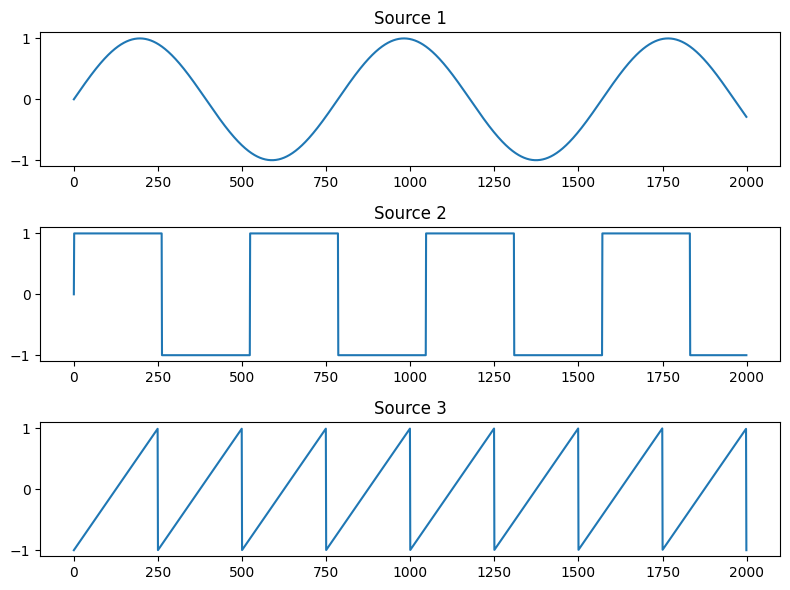

In [45]:
# Plot the results
plt.figure(figsize=(8, 6))
 
plt.subplot(3, 1, 1)
plt.title('Source 1')
plt.plot(s_1)
 
plt.subplot(3, 1, 2)
plt.title('Source 2')
plt.plot(s_2)
 
plt.subplot(3, 1, 3)
plt.title('Source 3')
plt.plot(s_3)
 
plt.tight_layout()
plt.show()

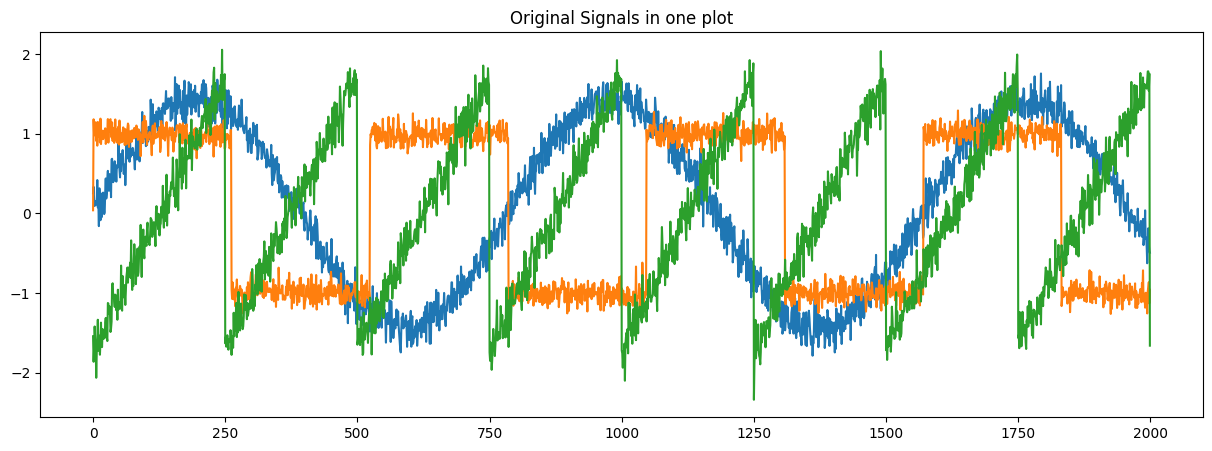

In [46]:
plt.figure(figsize=(15, 5))

colors = ['red', 'blue', 'orange']
plt.title('Original Signals in one plot')
plt.plot(S)

So now from the above plot we can see the three source signals as independently. Now we will mix these signal as they will be received at the microphone.

In [47]:
# Mix the signals
A = np.array([[1, -1, 1], [1.5, 1, 1], [1, 1.5, 2]])  # Mixing matrix
X = S.dot(A.T)  # Observed mixed signals

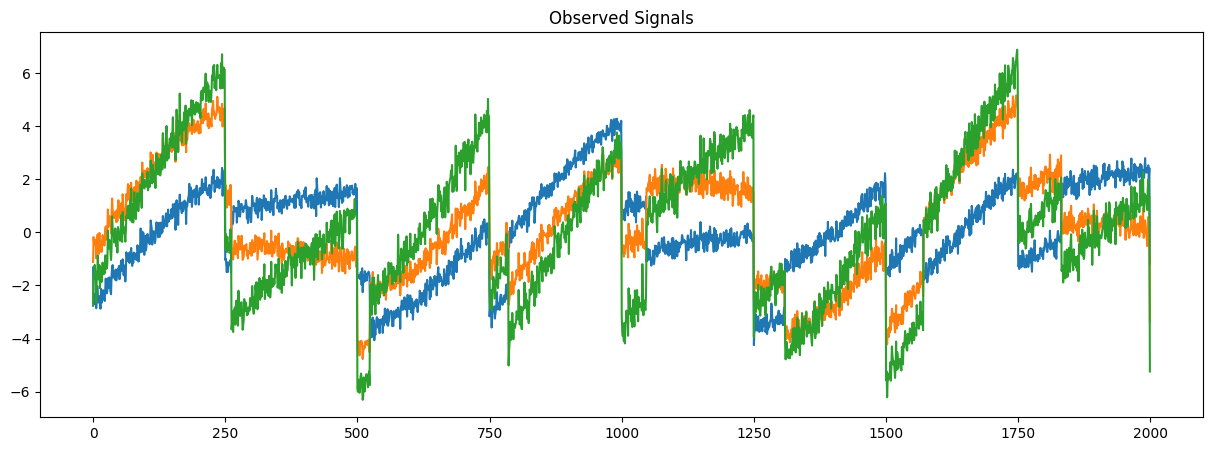

In [48]:
plt.figure(figsize=(15, 5))
plt.title('Observed Signals')
plt.plot(X)

### **Apply ICA from sklearn**

In [49]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Estimated sources

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



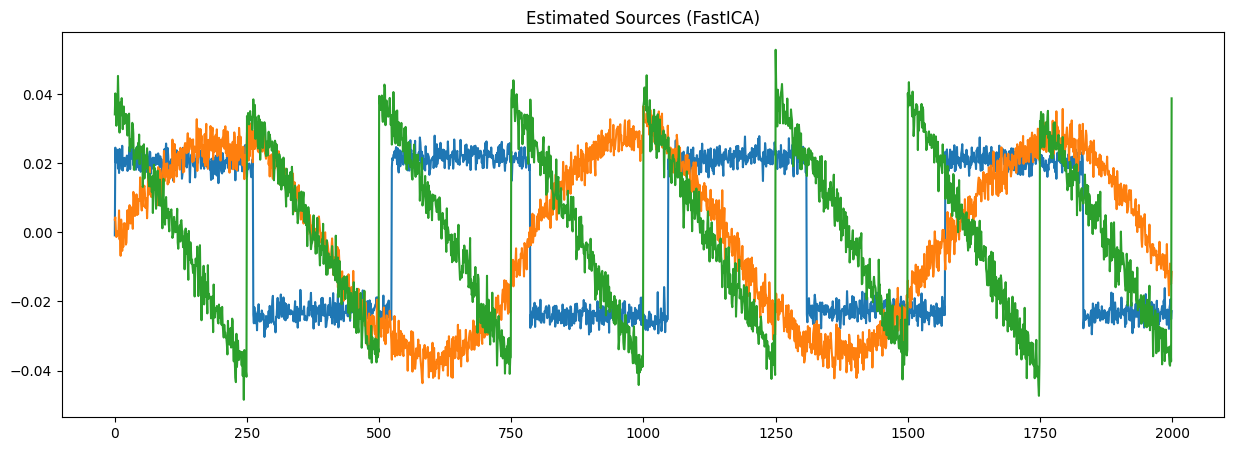

In [50]:
plt.figure(figsize=(15, 5))
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

So now we have seen that using ICA we can reconstruct the original signals from the mixed one's.

This example demonstrates how ICA can separate mixed signals into their independent components, even when noise is present.

# **SelectKBest**
SelectKBest is a feature selection method in Scikit-learn that selects the top k features based on univariate statistical tests. It can significantly improve the performance of machine learning models by removing irrelevant or redundant features.


**How SelectKBest Work?**

1. The first Filter is the Filter. Its feature selection is unrelated to any special machine learning algorithm but instead depends on statistical measures to compute attribute scores and rank them.

2. SelectKBest uses statistical tests like chi-squared test, ANOVA F-test, or mutual information score to score and rank the features. It refers then on low Scoring Outputs (LSO): The concept here is that you wish to silence a few noisy outputs in order to preserve those which are useful for further processing. If all were silenced, nothing could ever happen! Since if every S-out is noise, then their sum is also noise. On the other hand one or two of them may well contain valid data.

3. SelectKBest is simple and fast, and it provides a way to cut down the feature set to a smaller size when faced with large datasets.

SelectKBest has two parameters: score function and k.
Score function is used to evaluate the feature importance. We have different types of score functions.

Some of the commonly used score_func functions in SelectKBest:

1. `f_regression`: It is used for linear regression problems and computes F-value between feature and target.

2. `mutual_info_regression`: It is used for regression problems and computes mutual information between two random variables.

3. `f_classif`: It is used for classification problems and computes ANOVA F-value between feature and target.

4. `mutual_info_classif`: It is used for classification problems and computes mutual information between two discrete variables.

5. `chi2`: It is used for classification problems and computes chi-squared statistics between each feature and target.

6. `SelectPercentile`: It is used to select the highest X% of the 
features based on the score_func.

K is the numerical value that represents the top number of features to be picked.

Now let's craete some classification data an apply SelectKBest algo on that.

In [51]:
X, y = make_classification(
    n_features=20,
    n_classes=4,
    n_samples=3000,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)

In [52]:
X.shape, y.shape

((3000, 20), (3000,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
# Standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train

array([[0.57764771, 0.4014958 , 0.28279719, ..., 0.58197113, 0.54384097,
        0.59794636],
       [0.78826128, 0.35007021, 0.24416837, ..., 0.394724  , 0.79405343,
        0.59632893],
       [0.44924327, 0.97010556, 0.45666759, ..., 0.3139187 , 0.49824882,
        0.65197834],
       ...,
       [0.49109793, 0.40346695, 0.21438165, ..., 0.24907292, 0.29000346,
        0.66816549],
       [0.61259217, 0.27913167, 0.38497301, ..., 0.23633111, 0.85265559,
        0.37391162],
       [0.41493347, 0.43303847, 0.36509107, ..., 0.40056521, 0.513464  ,
        0.43113656]])

As our data is calssification data so we can use either chi2, mutual_info_classif or f_classif. We will apply these three one by one on our data to see the results. Secondly we select the top four features.

In [56]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

### **`score_func = chi2`**

In [57]:
# select top 2 features using chi2
selector = SelectKBest(chi2, k = 4)
X_train_chi = selector.fit_transform(X_train, y_train)
X_test_chi = selector.transform(X_test)
print(f"Selected features: {selector.get_support(indices=True)}")
print(f"Feature scores: {selector.scores_}")

Selected features: [ 6 12 16 17]
Feature scores: [8.36445185e-02 1.09440569e-02 7.58053211e-02 2.57621436e-02
 1.52839192e-01 1.94175661e-01 5.55038746e+01 1.14675091e-01
 2.90533218e-02 9.96673527e-02 2.11562535e-02 2.17298003e-01
 4.60360664e+01 3.79254391e-01 7.34130685e-02 1.11573593e-01
 4.44570166e+01 8.26803022e+01 7.16471526e-03 1.20599370e-01]


In [58]:
# Train a RandomForestClassifier on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_chi, y_train)

# Predict on the test set
y_pred = model.predict(X_test_chi)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")


Accuracy with selected features: 0.905


### **`score_func = mutual_info_classif`**

In [59]:
# select top 2 features using chi2
selector = SelectKBest(mutual_info_classif, k = 4)
X_train_mic = selector.fit_transform(X_train, y_train)
X_test_mic = selector.transform(X_test)
print(f"Selected features: {selector.get_support(indices=True)}")
print(f"Feature scores: {selector.scores_}")

Selected features: [ 6 12 16 17]
Feature scores: [0.01865642 0.01556325 0.00126391 0.         0.         0.
 0.47588157 0.00095486 0.         0.         0.01845821 0.
 0.61930454 0.00200046 0.         0.         0.53257096 0.47316893
 0.00942285 0.        ]


In [60]:
# Train a RandomForestClassifier on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_mic, y_train)

# Predict on the test set
y_pred = model.predict(X_test_mic)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")


Accuracy with selected features: 0.905


### **`score_func = f_classif`**

In [61]:
selector = SelectKBest(f_classif, k = 4)
X_train_f = selector.fit_transform(X_train, y_train)
X_test_f = selector.transform(X_test)
print(f"Selected features: {selector.get_support(indices=True)}")
print(f"Feature scores: {selector.scores_}")

Selected features: [ 6 12 16 17]
Feature scores: [7.84288239e-01 7.62653259e-02 4.74058527e-01 2.41449151e-01
 1.39732280e+00 1.43830064e+00 1.11800377e+03 8.92514042e-01
 2.07273522e-01 7.05586969e-01 1.81693426e-01 1.57198734e+00
 1.08121756e+03 2.48550831e+00 6.59164494e-01 9.77970870e-01
 1.07379485e+03 1.19866675e+03 6.65396343e-02 9.56816755e-01]


In [62]:
# Train a RandomForestClassifier on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_f, y_train)

# Predict on the test set
y_pred = model.predict(X_test_f)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")

Accuracy with selected features: 0.905


We can see for our data the three methods have given us same features and accuracy, but it may not be the case with every data.

Chi-Square (chi2): Best for categorical features and non-negative values.

Mutual Information (mutual_info_classif): Captures non-linear relationships and works with mixed data types.

ANOVA F-Value (f_classif): Best for continuous features and linear relationships with the target.

# **Recursive Feature Elimination (RFE)**
Recursive Feature Elimination (RFE) is a feature selection algorithm that is used to select a subset of the most relevant features from a dataset. It is a recursive process that starts with all the features in the dataset and then iteratively removes the least essential features until the desired number of features is reached.

### **Main Idea of RFE**
- There are more important features that weigh more in their effect on the target variable.

- Prediction is better made using the important characteristics.

### **Process**

- Uses (e.g. linear regression, support vector machine) computes features worth according to their importance.

- The least important feature is removed at each turn.

- In this way by iteratively removing the least important features, the number of features is gradually decreased.

### **Role of recursive function(x) in RFE**

- Feature selection is conducted till the required number of features has been identified.
- During each iteration:
    - Subtract the least useful features.
    - Refit those remaining important features to produce a new model.

- This process continues until either:
     - All the necessary variables are selected.
     - The model stops improving.

We can use RFE in sklearn. Here is an example code:

In [63]:
from sklearn.feature_selection import RFECV 

# Create a decision tree classifier 
model = RandomForestClassifier() 
  
selector = RFECV(model, cv = 3) 
selector = selector.fit(X_train, y_train) 
  
# Print the optimal number of features 
print("Optimal number of features: %d" % selector.n_features_) 
  
# Print the selected features 
print("Selected features: %s" % selector.support_) 

Optimal number of features: 9
Selected features: [False False False  True False  True  True False  True False  True False
  True False False False  True  True False  True]


Now that we have got the selected features, now we will train data only using these selected features.

In [64]:
X_selected = X_train[:, selector.support_] 

In [65]:
X_selected_test = X_test[:, selector.support_]

In [66]:
model.fit(X_selected, y_train) 

RandomForestClassifier()

In [67]:
# Make predictions using the selected features 
y_pred = model.predict(X_selected_test)
accuracy_score(y_pred, y_test)

0.9066666666666666

This comprehensive exploration of dimensionality reduction techniques provides a solid foundation for leveraging these powerful tools in various data science and machine learning tasks. As you continue to work with high-dimensional data, these techniques will be invaluable in unlocking the full potential of your datasets and improving the overall performance of your models.